In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import model_selection

import tkinter as tk
from tkinter import *
from tkinter import messagebox
from tkinter import filedialog

import os




In [3]:
dfl = []
dfl.append(pd.read_csv('./Cycle_test/Cycle_2000.csv', engine='python', encoding='cp949'))
dfl.append(pd.read_csv('./Cycle_test/Cycle_4000.csv', engine='python', encoding='cp949'))
dfl.append(pd.read_csv('./Cycle_test/Cycle_6000.csv', engine='python', encoding='cp949'))
dfl.append(pd.read_csv('./Cycle_test/Cycle_8000.csv', engine='python', encoding='cp949'))
dfl.append(pd.read_csv('./Cycle_test/Cycle_10000.csv', engine='python', encoding='cp949'))
dfl.append(pd.read_csv('./Cycle_test/Cycle_12000.csv', engine='python', encoding='cp949'))
dfl.append(pd.read_csv('./Cycle_test/Cycle_14000.csv', engine='python', encoding='cp949'))

In [4]:
import torch
import random
def seed_everything(seed):
    torch.manual_seed(seed) 
    torch.cuda.manual_seed(seed) 
    torch.cuda.manual_seed_all(seed)  
    torch.backends.cudnn.deterministic = True 
    torch.backends.cudnn.benchmark = False
    np.random.seed(seed) 
    random.seed(seed) 
seed_everything(1212)

C:\Users\xorjf\anaconda3\envs\Review\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
###데이터 연결
df = pd.concat(dfl)
df.reset_index()

df.describe()
# df.head()

,PackVol,Current,Cycle,Temp1,Temp2,Temp3,Temp4,Temp5,AmbT,MaxTemp,...,CellVol13,CellVol14,CellVol15,CellVol16,MaxCellVol,MinCellVol,CellVDiff,MeanCellV,StdCellV,Cycle_
count,4.790678e+06,4.790678e+06,4.790678e+06,4.790678e+06,4.790678e+06,4.790678e+06,4.790678e+06,4.790678e+06,4.790678e+06,4.790678e+06,...,4.790678e+06,4.790678e+06,4.790678e+06,4.790678e+06,4.790678e+06,4.790678e+06,4.790678e+06,4.790678e+06,4.790678e+06,4.098753e+06
mean,6.415223e+01,-4.131076e-02,6.895448e+03,3.097166e+01,3.177627e+01,2.990838e+01,3.041434e+01,3.354860e+01,2.606928e+01,3.355270e+01,...,4.008903e+00,4.008382e+00,4.012107e+00,4.017059e+00,4.019954e+00,4.001320e+00,1.863411e-02,4.009486e+00,5.759087e-03,9.423482e+02
std,2.697446e+00,4.459792e+00,4.070012e+03,2.731880e+00,1.943668e+00,1.938671e+00,1.967575e+00,2.358396e+00,1.828376e+00,2.344854e+00,...,1.666244e-01,1.651700e-01,1.623232e-01,1.658745e-01,1.620492e-01,1.769671e-01,2.812260e-02,1.678510e-01,8.648675e-03,5.804834e+02
min,4.162500e+01,-8.511000e+00,1.000000e+00,2.140000e+01,2.290000e+01,1.950000e+01,2.180000e+01,2.330000e+01,9.000000e+00,2.340000e+01,...,2.641000e+00,2.626000e+00,2.709000e+00,2.563000e+00,2.709000e+00,2.399000e+00,2.000000e-03,2.602375e+00,6.800740e-04,0.000000e+00
25%,6.367700e+01,-3.501000e+00,3.394000e+03,2.840000e+01,3.110000e+01,2.850000e+01,2.970000e+01,3.220000e+01,2.580000e+01,3.220000e+01,...,3.978000e+00,3.981000e+00,3.984000e+00,3.983000e+00,3.987000e+00,3.975000e+00,9.000000e-03,3.981375e+00,2.743933e-03,4.410000e+02
50%,6.454100e+01,-9.950000e-01,6.717000e+03,3.150000e+01,3.150000e+01,3.010000e+01,3.070000e+01,3.300000e+01,2.600000e+01,3.300000e+01,...,4.033000e+00,4.034000e+00,4.035000e+00,4.036000e+00,4.040000e+00,4.030000e+00,1.400000e-02,4.035000e+00,4.349329e-03,9.330000e+02
75%,6.561100e+01,3.002000e+00,1.060400e+04,3.340000e+01,3.280000e+01,3.120000e+01,3.120000e+01,3.500000e+01,2.710000e+01,3.500000e+01,...,4.099000e+00,4.096000e+00,4.100000e+00,4.108000e+00,4.108000e+00,4.094000e+00,2.200000e-02,4.099188e+00,6.791846e-03,1.425000e+03
max,6.745100e+01,9.385000e+00,1.400000e+04,3.630000e+01,3.710000e+01,3.580000e+01,3.620000e+01,4.000000e+01,3.420000e+01,4.000000e+01,...,4.219000e+00,4.214000e+00,4.220000e+00,4.244000e+00,4.244000e+00,4.203000e+00,6.640000e-01,4.209937e+00,2.104027e-01,2.000000e+03


In [6]:
# pd.to_datetime(df['Date'], format='%Y-%m-%d')
# # 2020-01-07

# df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
# df['year'] =df['Date'].dt.year
# df['month'] =df['Date'].dt.month
# df['day'] =df['Date'].dt.day
df = df.reset_index()
df

,index,PackVol,Current,Cycle,Temp1,Temp2,Temp3,Temp4,Temp5,AmbT,...,CellVol13,CellVol14,CellVol15,CellVol16,MaxCellVol,MinCellVol,CellVDiff,MeanCellV,StdCellV,Cycle_
0,0,49.652,0.000,1,25.8,25.9,26.0,25.8,25.8,26.3,...,3.113,3.110,3.133,3.089,3.133,3.068,0.065,3.103562,0.019476,NaN
1,1,49.652,0.000,1,25.8,25.9,26.0,25.7,25.8,26.3,...,3.113,3.110,3.133,3.089,3.133,3.068,0.065,3.103500,0.019322,NaN
2,2,49.645,0.000,1,25.9,25.9,26.0,25.8,25.8,26.3,...,3.113,3.110,3.133,3.089,3.133,3.068,0.065,3.103687,0.019455,NaN
3,3,49.642,0.000,1,25.9,25.9,26.0,25.7,25.8,26.3,...,3.113,3.110,3.133,3.089,3.133,3.068,0.065,3.103500,0.019394,NaN
4,4,49.652,0.000,1,25.8,25.8,26.0,25.8,25.8,26.3,...,3.113,3.110,3.132,3.089,3.132,3.068,0.064,3.103625,0.019380,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4790673,712979,65.123,-1.000,14000,33.7,33.4,31.5,31.3,35.8,26.5,...,4.070,4.071,4.073,4.076,4.077,4.065,0.012,4.070625,0.004015,2000.0
4790674,712980,65.112,-1.003,14000,33.7,33.3,31.5,31.3,35.8,26.5,...,4.070,4.071,4.073,4.075,4.077,4.064,0.013,4.070125,0.004097,2000.0
4790675,712981,65.112,-1.001,14000,33.7,33.3,31.5,31.4,35.8,26.5,...,4.069,4.070,4.072,4.075,4.076,4.064,0.012,4.069687,0.004143,2000.0
4790676,712982,65.105,-1.001,14000,33.8,33.3,31.5,31.4,35.8,26.5,...,4.069,4.070,4.072,4.075,4.076,4.064,0.012,4.069500,0.004163,2000.0


In [7]:
###10%만 추출
df_s = df.loc[[x for x in range(0, len(df)) if x%10==0],:]
df = df_s
df_s

,index,PackVol,Current,Cycle,Temp1,Temp2,Temp3,Temp4,Temp5,AmbT,...,CellVol13,CellVol14,CellVol15,CellVol16,MaxCellVol,MinCellVol,CellVDiff,MeanCellV,StdCellV,Cycle_
0,0,49.652,0.000,1,25.8,25.9,26.0,25.8,25.8,26.3,...,3.113,3.110,3.133,3.089,3.133,3.068,0.065,3.103562,0.019476,NaN
10,10,49.655,0.000,1,25.8,25.9,26.0,25.7,25.8,26.3,...,3.113,3.110,3.133,3.090,3.133,3.068,0.065,3.103625,0.019390,NaN
20,20,48.850,-1.500,1,25.8,25.9,26.0,25.7,25.8,26.3,...,3.062,3.059,3.084,3.038,3.084,3.016,0.068,3.053500,0.019977,NaN
30,30,48.296,-1.500,1,25.8,25.9,26.0,25.8,25.8,26.3,...,3.028,3.025,3.051,3.002,3.051,2.979,0.072,3.019188,0.021377,NaN
40,40,47.810,-1.502,1,25.9,25.9,26.1,25.8,25.9,26.4,...,2.998,2.993,3.022,2.971,3.022,2.945,0.077,2.988250,0.022714,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4790630,712936,67.206,8.497,14000,33.5,33.0,31.2,31.1,35.7,25.8,...,4.204,4.197,4.202,4.219,4.219,4.186,0.033,4.197875,0.009992,2000.0
4790640,712946,66.625,4.698,14000,33.6,33.1,31.3,31.2,35.8,26.0,...,4.167,4.163,4.166,4.179,4.179,4.154,0.025,4.163250,0.007664,2000.0
4790650,712956,66.159,3.003,14000,33.6,33.2,31.5,31.3,35.8,26.3,...,4.136,4.134,4.137,4.146,4.146,4.127,0.019,4.134188,0.006091,2000.0
4790660,712966,65.259,-0.998,14000,33.7,33.3,31.7,31.2,35.8,26.3,...,4.079,4.079,4.082,4.085,4.086,4.073,0.013,4.079063,0.004250,2000.0


In [8]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scale_cols = ['MaxTemp', 'MinTemp', 'StdCellV', 'Current', 'PackVol',]
df_scaled = scaler.fit_transform(df[scale_cols])

df_scaled = pd.DataFrame(df_scaled)
df_scaled.columns = scale_cols

print(df_scaled)

         MaxTemp   MinTemp  StdCellV   Current   PackVol
0       0.175758  0.781818  0.098935  0.475523  0.309841
1       0.175758  0.777273  0.098482  0.475523  0.309957
2       0.175758  0.777273  0.101568  0.391696  0.278646
3       0.175758  0.781818  0.108937  0.391696  0.257098
4       0.181818  0.781818  0.115977  0.391584  0.238195
...          ...       ...       ...       ...       ...
479063  0.745455  0.695455  0.049016  0.950374  0.992610
479064  0.751515  0.700000  0.036759  0.738069  0.970012
479065  0.751515  0.713636  0.028479  0.643344  0.951886
479066  0.751515  0.722727  0.018790  0.419750  0.916881
479067  0.757576  0.727273  0.018458  0.419750  0.912369

[479068 rows x 5 columns]


Text(0, 0.5, 'MaxTemp')

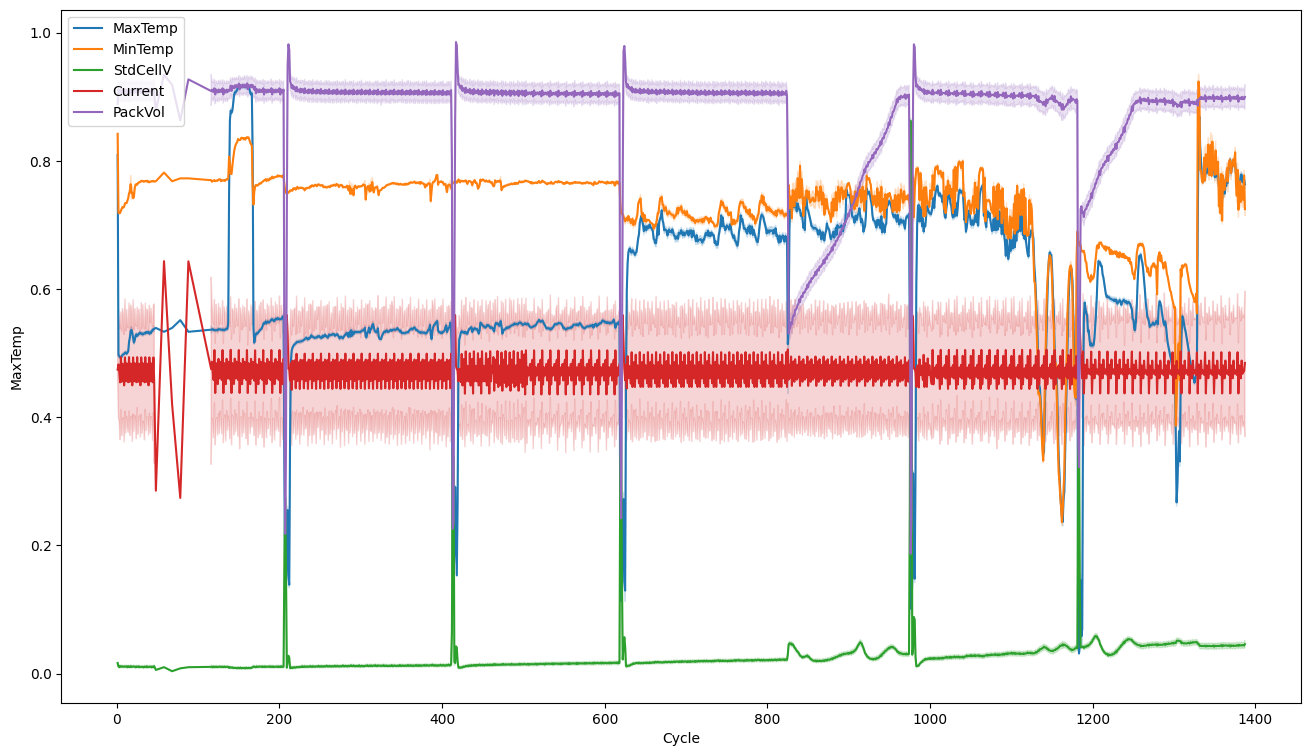

In [9]:
plt.figure(figsize=(16, 9))
sns.lineplot(y=df_scaled['MaxTemp'], x=df['Cycle'], label='MaxTemp')
sns.lineplot(y=df_scaled['MinTemp'], x=df['Cycle'], label='MinTemp')
sns.lineplot(y=df_scaled['StdCellV'], x=df['Cycle'], label='StdCellV')
sns.lineplot(y=df_scaled['Current'], x=df['Cycle'], label='Current')
sns.lineplot(y=df_scaled['PackVol'], x=df['Cycle'], label='PackVol')

plt.legend()
plt.xlabel('Cycle')
plt.ylabel('MaxTemp')

In [10]:
TEST_SIZE = len(df)//100
### 과거부터 90%의 데이터를 학습하게 되고, TEST를 위해서 마지막 10%의 데이터로 모델이 예측하도록

In [11]:
train = df_scaled[:-TEST_SIZE]
test = df_scaled[-TEST_SIZE:]

def make_dataset(data, label, window_size=15): # window_size에 기반하여 15일 기간의 데이터 셋을 묶어 주는 역할
    feature_list = []
    label_list = []
    for i in range(len(data) - window_size):
        feature_list.append(np.array(data.iloc[i:i+window_size]))
        label_list.append(np.array(label.iloc[i:i+window_size]))
    return np.array(feature_list), np.array(label_list)

In [12]:
feature_cols = ['MaxTemp','MinTemp','PackVol','Current','StdCellV']
# feature_cols = ['Aux Temp. Max', 'Aux Temp. Min', 'Current(A)', 'Capacity(Ah)']
label_cols = ['MaxTemp','MinTemp','PackVol','Current','StdCellV']

train_feature = train[feature_cols]
train_label = train[label_cols]

# train dataset
train_feature, train_label = make_dataset(train_feature, train_label, 10)
print(train_feature.shape, train_label.shape)

# train, validation set 생성
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(train_feature, train_label, test_size=0.2)

print(x_train.shape, x_valid.shape)

test_feature = test[feature_cols]
test_label = test[label_cols]

test_feature2 = test[feature_cols]
test_label2 = test[label_cols]

test_feature3 = test[feature_cols]
test_label3 = test[label_cols]

test_feature4 = test[feature_cols]
test_label4 = test[label_cols]

# test dataset (실제 예측 해볼 데이터)
test_feature, test_label = make_dataset(test_feature, test_label, 10)
print(test_feature.shape, test_label.shape)
# ((180, 20, 4), (180, 1))

test_feature2, test_label2 = make_dataset(test_feature2, test_label2, 10)
print(test_feature2.shape, test_label2.shape)
# ((180, 20, 4), (180, 1))

test_feature3, test_label3 = make_dataset(test_feature3, test_label3, 10)
print(test_feature3.shape, test_label3.shape)
# ((180, 20, 4), (180, 1))

test_feature4, test_label4 = make_dataset(test_feature4, test_label4, 10)
print(test_feature4.shape, test_label4.shape)
# ((180, 20, 4), (180, 1))

(474268, 10, 5) (474268, 10, 5)
(379414, 10, 5) (94854, 10, 5)
(4780, 10, 5) (4780, 10, 5)
(4780, 10, 5) (4780, 10, 5)
(4780, 10, 5) (4780, 10, 5)
(4780, 10, 5) (4780, 10, 5)


In [10]:
from sklearn.preprocessing import MinMaxScaler

# 데이터 스케일링
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df[feature_cols])
df_scaled = pd.DataFrame(df_scaled, columns=feature_cols)

# 스케일링된 데이터로 학습 및 테스트 데이터 분할
train_scaled = df_scaled[:-TEST_SIZE]
test_scaled = df_scaled[-TEST_SIZE:]

NameError: name 'feature_cols' is not defined

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , RepeatVector, TimeDistributed
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import LSTM
from tensorflow.keras import Model
from tensorflow.keras import models, layers

import keras
import tensorflow as tf

class Autoencoder(tf.keras.Model):
    def __init__(self):
        super(Autoencoder, self).__init__() 
        self.encoder = tf.keras.Sequential([
            layers.LSTM(128, activation='relu' ,return_sequences=True),
            layers.LSTM(64, activation='relu',return_sequences=False),
            layers.Dense(32),
            layers.RepeatVector(1),
            layers.Dense(3, activation='sigmoid'),
            
        ])
        self.decoder = tf.keras.Sequential([
            layers.Dense(32),
            layers.LSTM(64, activation='relu',return_sequences=True),
            layers.LSTM(128, activation='relu',return_sequences=True),
            layers.Dense(10, activation='sigmoid'),
            layers.Reshape((10, 1))
        ])

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

autoencoder = Autoencoder()

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , RepeatVector, TimeDistributed
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import LSTM
from tensorflow.keras import Model
from tensorflow.keras import models, layers

import tensorflow as tf

from tensorflow.keras import backend as K
from tensorflow.keras.layers import Layer

class AttentionLayer(Layer):
    def __init__(self, **kwargs):
        super(AttentionLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        self.W = self.add_weight(name="att_weight", shape=(input_shape[-1], 1), initializer="normal")
        self.b = self.add_weight(name="att_bias", shape=(input_shape[1], 1), initializer="zeros")
        super(AttentionLayer, self).build(input_shape)

    def call(self, x):
        e = K.tanh(K.dot(x, self.W) + self.b)
        a = K.softmax(e, axis=1)
        output = x * a
        return K.sum(output, axis=1)

    def compute_output_shape(self, input_shape):
        return (input_shape[0], input_shape[-1])
    
    def attention_autoencoder_model(X):
        sequence_length, feature_dim = X.shape[1], X.shape[2]

        # Encoder
        inputs = Input(shape=(sequence_length, feature_dim), name='encoder_input')
        encoded = LSTM(128, return_sequences=True, activation='tanh', name='encoder_lstm_1')(inputs)
        encoded = LSTM(64, return_sequences=True, activation='tanh', name='encoder_lstm_2')(encoded)
        encoded_final = LSTM(32, return_sequences=True, activation='tanh', name='encoder_lstm_3')(encoded)
    
        # Attention Mechanism
        attention = AttentionLayer(name='attention_layer')(encoded_final)
        encoded = Dense(3, name='encoder_dense')(attention)

        # Decoder
        decoded = RepeatVector(sequence_length, name='decoder_repeat_vector')(encoded) 
        decoded = LSTM(32, return_sequences=True, activation='tanh', name='decoder_lstm_1')(decoded)
        decoded = LSTM(64, return_sequences=True, activation='tanh', name='decoder_lstm_2')(decoded)
        decoded = LSTM(128, return_sequences=True, activation='tanh', name='decoder_lstm_3')(decoded)
        output = TimeDistributed(Dense(feature_dim), name='decoder_timedistributed_dense')(decoded)

        # Autoencoder
        model = Model(inputs, output, name='lstm_attention_autoencoder')
        model.compile(optimizer='adam', loss='mse')
        encoder = Model(inputs, encoded_final, name='encoder')

        return model


In [18]:
from tensorflow.keras.layers import Input, Dense, LayerNormalization, MultiHeadAttention, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Transformer Encoder Layer
def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    # Normalization and Attention
    x = LayerNormalization(epsilon=1e-6)(inputs)
    attn_output = MultiHeadAttention(key_dim=head_size, num_heads=num_heads, dropout=dropout)(x, x)
    x = attn_output + inputs  # Skip Connection
    x = LayerNormalization(epsilon=1e-6)(x)
    
    # Feed Forward Part
    ff_output = Dense(ff_dim, activation="relu")(x)
    ff_output = Dropout(dropout)(ff_output)
    ff_output = Dense(inputs.shape[-1])(ff_output)
    
    # Skip Connection
    output = ff_output + x
    return output

# Transformer Autoencoder Model
def transformer_autoencoder_model(sequence_length, feature_dim, head_size=64, num_heads=4, ff_dim=128, num_layers=3, dropout=0.1):
    inputs = Input(shape=(sequence_length, feature_dim))
    x = inputs

    # Encoder
    for _ in range(num_layers):
        x = transformer_encoder(x, head_size, num_heads, ff_dim, dropout)

    # Decoder - Ideally, you might have a separate decoder architecture. For simplicity, using the same encoder layers.
    for _ in range(num_layers):
        x = transformer_encoder(x, head_size, num_heads, ff_dim, dropout)

    model = Model(inputs, x)
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['accuracy'])
    return model

# Example: Define your `sequence_length` and `feature_dim` based on your data
sequence_length = 100  # This should be the length of your sequences
feature_dim = 512     # This should be the dimensionality of your features

# Create the autoencoder model
model = transformer_autoencoder_model(sequence_length=sequence_length, feature_dim=feature_dim)
model.summary()  # Print model summary

# Note: Before training the model, ensure you have defined `X_train` and other required datasets correctly.


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 100, 512)]           0         []                            
                                                                                                  
 layer_normalization (Layer  (None, 100, 512)             1024      ['input_3[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 multi_head_attention (Mult  (None, 100, 512)             525568    ['layer_normalization[0][0]', 
 iHeadAttention)                                                     'layer_normalization[0][0]'] 
                                                                                              

 multi_head_attention_3 (Mu  (None, 100, 512)             525568    ['layer_normalization_6[0][0]'
 ltiHeadAttention)                                                  , 'layer_normalization_6[0][0]
                                                                    ']                            
                                                                                                  
 tf.__operators__.add_6 (TF  (None, 100, 512)             0         ['multi_head_attention_3[0][0]
 OpLambda)                                                          ',                            
                                                                     'tf.__operators__.add_5[0][0]
                                                                    ']                            
                                                                                                  
 layer_normalization_7 (Lay  (None, 100, 512)             1024      ['tf.__operators__.add_6[0][0]
 erNormali

In [19]:
import pandas as pd
import numpy as np 
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt
%matplotlib inline 
# Jupiter magic command to display plots in the notebook

from tensorflow.keras.layers import Input, Dropout, Dense, LSTM, TimeDistributed, RepeatVector
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers

In [14]:
#모델 컴파일
autoencoder.compile(optimizer='adam',
                    loss='binary_crossentropy',
                    metrics=['accuracy'])

In [ ]:
model = AttentionLayer.attention_autoencoder_model(x_train)
#모델 컴파일
model.compile(optimizer='adam',
                    loss='binary_crossentropy',
                    metrics=['accuracy'])

In [16]:
model = AttentionLayer.attention_autoencoder_model(x_train)
#모델 컴파일
model.compile(optimizer='adam',
                    loss='binary_crossentropy',
                    metrics=['accuracy'])

In [21]:
from tensorflow.keras.utils import plot_model

plot_model(autoencoder, show_shapes=True, to_file='model.png')

ValueError: This model has not yet been built. Build the model first by calling `build()` or by calling the model on a batch of data.

In [22]:
plot_model(autoencoder, show_shapes=False, to_file='model.png')



ValueError: This model has not yet been built. Build the model first by calling `build()` or by calling the model on a batch of data.

In [15]:
from tensorflow.keras import backend as K

model_path = "./"

autoencoder.compile(loss='MSE', optimizer='adam', metrics=['accuracy'])
early_stop = EarlyStopping(monitor='val_MSE', patience=10)
# filename = os.path.join(model_path, 'tmp_checkpoint.h5')
# checkpoint = ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')

history = autoencoder.fit(x_train, x_train, 
                    epochs=200, 
                    batch_size=1028,
                    validation_data=(x_valid, y_valid), 
#                     callbacks=[early_stop, checkpoint]
                   )

Epoch 1/200
370/370 [==============================] - 31s 70ms/step - loss: 0.1027 - accuracy: 2.3615e-05 - val_loss: 0.1016 - val_accuracy: 3.1206e-05
Epoch 2/200
370/370 [==============================] - 25s 68ms/step - loss: 0.1010 - accuracy: 2.6673e-05 - val_loss: 0.1008 - val_accuracy: 3.1838e-05
Epoch 3/200
370/370 [==============================] - 25s 67ms/step - loss: 0.1008 - accuracy: 2.6673e-05 - val_loss: 0.1005 - val_accuracy: 3.1838e-05
Epoch 4/200
370/370 [==============================] - 25s 68ms/step - loss: 0.1005 - accuracy: 2.6884e-05 - val_loss: 0.1004 - val_accuracy: 3.1838e-05
Epoch 5/200
370/370 [==============================] - 25s 67ms/step - loss: 0.1004 - accuracy: 2.7042e-05 - val_loss: 0.1003 - val_accuracy: 3.1628e-05
Epoch 6/200
370/370 [==============================] - 25s 68ms/step - loss: 0.1003 - accuracy: 2.7094e-05 - val_loss: 0.1002 - val_accuracy: 3.1628e-05
Epoch 7/200
370/370 [==============================] - 25s 68ms/step - loss: 0.100

370/370 [==============================] - 25s 67ms/step - loss: 0.0997 - accuracy: 2.7358e-05 - val_loss: 0.0997 - val_accuracy: 3.1838e-05
Epoch 55/200
370/370 [==============================] - 25s 68ms/step - loss: 0.0997 - accuracy: 2.7358e-05 - val_loss: 0.0997 - val_accuracy: 3.1838e-05
Epoch 56/200
370/370 [==============================] - 25s 67ms/step - loss: 0.0997 - accuracy: 2.7358e-05 - val_loss: 0.0997 - val_accuracy: 3.1838e-05
Epoch 57/200
370/370 [==============================] - 25s 68ms/step - loss: 0.0997 - accuracy: 2.7358e-05 - val_loss: 0.0997 - val_accuracy: 3.1838e-05
Epoch 58/200
370/370 [==============================] - 25s 68ms/step - loss: 0.0997 - accuracy: 2.7358e-05 - val_loss: 0.0997 - val_accuracy: 3.1838e-05
Epoch 59/200
370/370 [==============================] - 25s 67ms/step - loss: 0.0997 - accuracy: 2.7358e-05 - val_loss: 0.0997 - val_accuracy: 3.1838e-05
Epoch 60/200
370/370 [==============================] - 25s 68ms/step - loss: 0.0997 - ac

370/370 [==============================] - 24s 66ms/step - loss: 0.0997 - accuracy: 2.7358e-05 - val_loss: 0.0997 - val_accuracy: 3.1838e-05
Epoch 108/200
370/370 [==============================] - 25s 67ms/step - loss: 0.0997 - accuracy: 2.7358e-05 - val_loss: 0.0997 - val_accuracy: 3.1838e-05
Epoch 109/200
370/370 [==============================] - 25s 67ms/step - loss: 0.0997 - accuracy: 2.7358e-05 - val_loss: 0.0996 - val_accuracy: 3.1838e-05
Epoch 110/200
370/370 [==============================] - 25s 68ms/step - loss: 0.0997 - accuracy: 2.7358e-05 - val_loss: 0.0996 - val_accuracy: 3.1838e-05
Epoch 111/200
370/370 [==============================] - 25s 68ms/step - loss: 0.0997 - accuracy: 2.7358e-05 - val_loss: 0.0997 - val_accuracy: 3.1838e-05
Epoch 112/200
370/370 [==============================] - 25s 68ms/step - loss: 0.0997 - accuracy: 2.7358e-05 - val_loss: 0.0997 - val_accuracy: 3.1838e-05
Epoch 113/200
370/370 [==============================] - 25s 67ms/step - loss: 0.099

Epoch 160/200
370/370 [==============================] - 25s 67ms/step - loss: 0.0997 - accuracy: 2.7358e-05 - val_loss: 0.0996 - val_accuracy: 3.1838e-05
Epoch 161/200
370/370 [==============================] - 25s 68ms/step - loss: 0.0997 - accuracy: 2.7358e-05 - val_loss: 0.0996 - val_accuracy: 3.1838e-05
Epoch 162/200
370/370 [==============================] - 25s 67ms/step - loss: 0.0997 - accuracy: 2.7358e-05 - val_loss: 0.0996 - val_accuracy: 3.1838e-05
Epoch 163/200
370/370 [==============================] - 25s 68ms/step - loss: 0.0997 - accuracy: 2.7358e-05 - val_loss: 0.0997 - val_accuracy: 3.1838e-05
Epoch 164/200
370/370 [==============================] - 25s 68ms/step - loss: 0.0997 - accuracy: 2.7358e-05 - val_loss: 0.0996 - val_accuracy: 3.1838e-05
Epoch 165/200
370/370 [==============================] - 25s 68ms/step - loss: 0.0997 - accuracy: 2.7358e-05 - val_loss: 0.0996 - val_accuracy: 3.1838e-05
Epoch 166/200
370/370 [==============================] - 25s 67ms/step

In [ ]:
from tensorflow.keras import backend as K
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import numpy as np
import os

model_path = "./"

# Replace 'model' with 'autoencoder'
autoencoder.compile(loss='MSE', optimizer='adam', metrics=['accuracy'])
early_stop = EarlyStopping(monitor='val_loss', patience=10)
# filename = os.path.join(model_path, 'tmp_checkpoint.h5')
# checkpoint = ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='auto', save_format='tf')

# Assuming x_train, x_valid, y_valid are already defined and preprocessed accordingly
# You also mentioned 'val_MSE' which is not a default Keras metric. You should use 'val_loss' as the monitor in EarlyStopping if your validation metric is MSE.
history = autoencoder.fit(x_train, x_train, 
                          epochs=100, 
                          batch_size=1028,
                          validation_data=(x_valid, y_valid), 
                          #callbacks=[early_stop, checkpoint]
                         )


Epoch 1/100


370/370 [==============================] - 32s 74ms/step - loss: 0.1027 - accuracy: 2.4037e-05 - val_loss: 0.1018 - val_accuracy: 3.1206e-05
Epoch 2/100
101/370 [=======>......................] - ETA: 19s - loss: 0.1018 - accuracy: 2.7546e-05

In [26]:
## 이걸 사용해주세요.! ##
# weight 로딩
# autoencoder.load_weights(filename)
# 예측
pred = model.predict(test_feature)
print(test_feature.shape)
test_label = test_label.reshape(4780,10,5)
test_loss = model.evaluate(test_feature, test_label, batch_size = 100,verbose=2)
print('Loss : ',test_loss[0] , ", Accuracy :" , test_loss[1])
print(test_loss)
model.summary()
#평가

NameError: name 'model' is not defined

In [37]:
# weight 로딩
# autoencoder.load_weights(filename)
# 예측
pred = model.predict(train_feature)
test_loss = model.evaluate(train_feature, train_label, batch_size = 100,verbose=2)
print('Loss : ',test_loss[0] , ", Accuracy :" , test_loss[1])
model.summary()
#평가

14821/14821 [==============================] - 123s 8ms/step


ValueError: Data cardinality is ambiguous:
  x sizes: 474268
  y sizes: 2371340
Make sure all arrays contain the same number of samples.

In [69]:
# weight 로딩
# autoencoder.load_weights(filename)
# 예측
pred = autoencoder.encoder.predict(train_feature)
test_loss = autoencoder.evaluate(train_feature, train_label, batch_size = 100,verbose=2)
print('Loss : ',test_loss[0] , ", Accuracy :" , test_loss[1])
autoencoder.summary()
#평가

14821/14821 [==============================] - 52s 4ms/step


ValueError: Data cardinality is ambiguous:
  x sizes: 474268
  y sizes: 2371340
Make sure all arrays contain the same number of samples.

In [68]:
print(train_feature.shape,train_label.shape,pred.shape)


(474268, 10, 5) (2371340, 10) (474268, 1, 32)


In [119]:
# weight 로딩
# autoencoder.load_weights(filename)
# 예측
pred = autoencoder.encoder.predict(train_feature[410000:420000])
test_loss = autoencoder.evaluate(train_feature, train_label, batch_size = 100,verbose=2)
print('Loss : ',test_loss[0] , ", Accuracy :" , test_loss[1])
autoencoder.summary()
#평가

313/313 [==============================] - 1s 4ms/step


KeyboardInterrupt: 

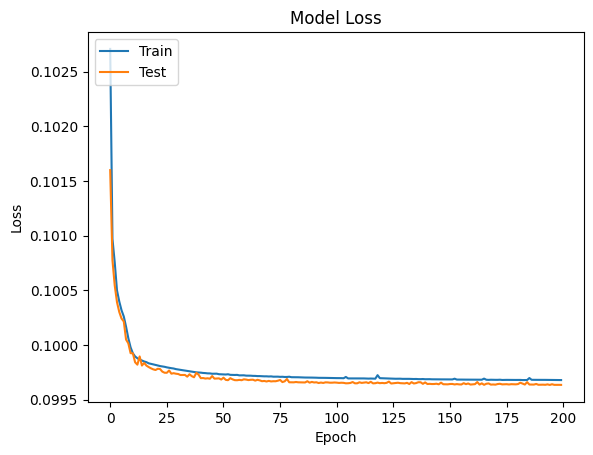

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

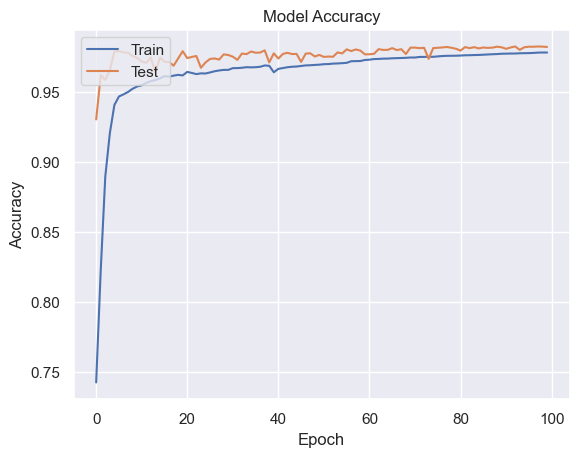

In [39]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [40]:
pred = pred.reshape(474268,3)
print(pred.shape)
pred_ = scaler.fit_transform(pred)
print(pred_)

ValueError: cannot reshape array of size 23713400 into shape (474268,3)

In [41]:
# MinMaxScaler 객체 생성 (원본 데이터 스케일링에 사용했다고 가정)
scaler = MinMaxScaler(feature_range=(min_value, max_value))

# 원본 데이터에 스케일링 적용
scaled_data = scaler.fit_transform(original_data)

# 모델 예측
predicted_scaled_data = model.predict(data)

# 예측된 스케일된 데이터를 원래 범위로 역변환
predicted_data = scaler.inverse_transform(predicted_scaled_data)


NameError: name 'min_value' is not defined

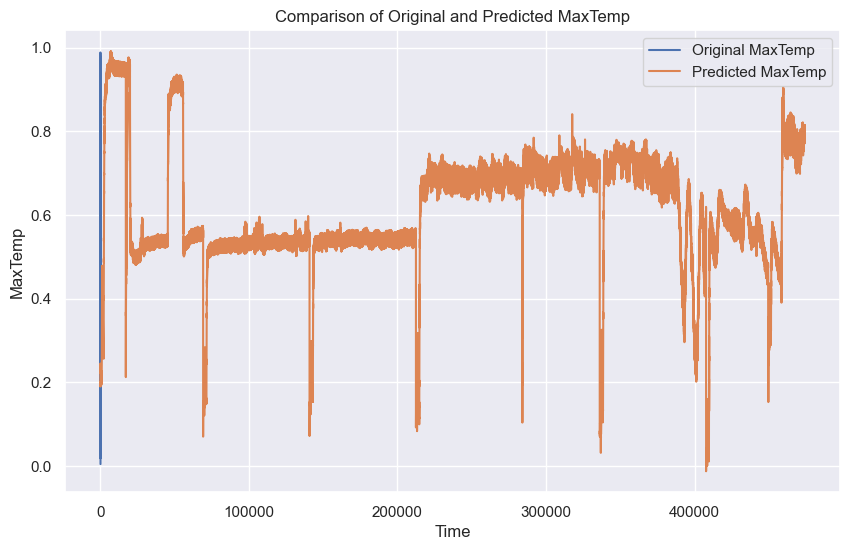

In [42]:
# 예측 데이터의 길이 조정
window_size = 10  # make_dataset 함수에서 사용된 윈도우 사이즈
predicted_data_adjusted = pred[:, -1, :]  # 마지막 시점의 예측만 사용

# 원본 데이터 매칭
# train_feature의 길이를 고려하여 원본 데이터를 슬라이싱
original_data_matched = df_scaled.iloc[window_size:len(predicted_data_adjusted)+window_size]

# 예를 들어, 'MaxTemp'에 대한 비교
original_maxtemp = original_data_matched['MaxTemp']
predicted_maxtemp = predicted_data_adjusted[:, feature_cols.index('MaxTemp')]

# 시각화
plt.figure(figsize=(10, 6))
plt.plot(original_maxtemp, label='Original MaxTemp')
plt.plot(predicted_maxtemp, label='Predicted MaxTemp')
plt.title('Comparison of Original and Predicted MaxTemp')
plt.xlabel('Time')
plt.ylabel('MaxTemp')
plt.legend()
plt.show()


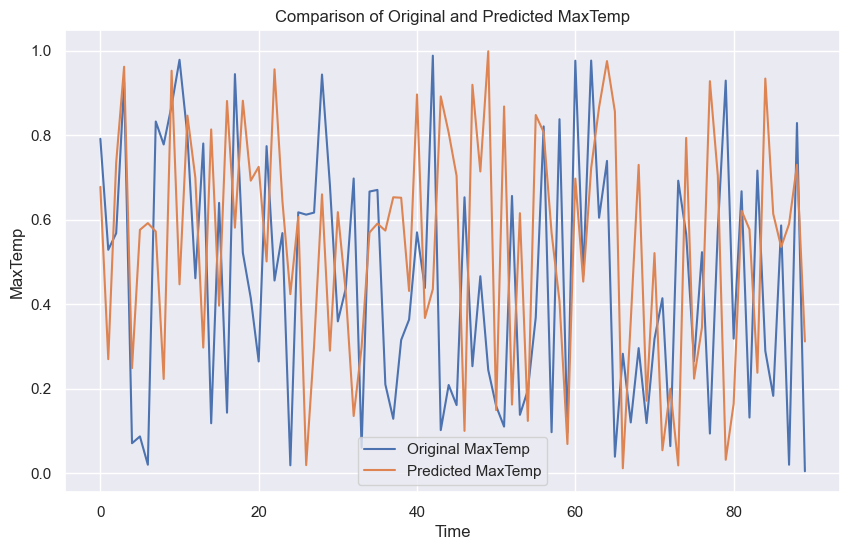

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 준비
np.random.seed(0)  # 재현 가능한 결과를 위한 난수 시드 설정
feature_cols = ['MaxTemp']
df = pd.DataFrame({
    'MaxTemp': np.random.rand(100)  # 임의의 'MaxTemp' 데이터 생성
})

# 데이터 스케일링 (여기서는 예시로 정규화 대신 임의 값 사용)
df_scaled = df.copy()

# 예측 데이터 생성 (예시로 무작위 데이터 사용)
pred = np.random.rand(90, 1, len(feature_cols))  # 90개의 예측 데이터, 마지막 차원은 특성 개수

# 예측 데이터의 길이 조정
window_size = 10
predicted_data_adjusted = pred[:, -1, 0]  # 마지막 시점의 예측만 사용

# 원본 데이터 매칭
original_data_matched = df_scaled.iloc[window_size:len(predicted_data_adjusted)+window_size]

# 'MaxTemp'에 대한 비교
original_maxtemp = original_data_matched['MaxTemp']
predicted_maxtemp = predicted_data_adjusted

# 시각화
plt.figure(figsize=(10, 6))
plt.plot(original_maxtemp.values, label='Original MaxTemp')  # .values로 numpy 배열로 변환
plt.plot(predicted_maxtemp, label='Predicted MaxTemp')
plt.title('Comparison of Original and Predicted MaxTemp')
plt.xlabel('Time')
plt.ylabel('MaxTemp')
plt.legend()
plt.show()


In [44]:
# 원본 데이터와 예측 데이터 간의 오차 계산
original_maxtemp = original_data_matched['MaxTemp']
predicted_maxtemp = predicted_data_adjusted[:, feature_cols.index('MaxTemp')]
error_maxtemp = np.abs(original_maxtemp - predicted_maxtemp)

# 시각화
plt.figure(figsize=(12, 6))
plt.plot(error_maxtemp, label='Error in MaxTemp')
plt.title('Error Over Time')
plt.xlabel('Time')
plt.ylabel('Error')
plt.legend()
plt.show()


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [45]:
# test_actual의 길이를 predicted와 맞추기 위해 첫 'window size'만큼의 데이터를 제거
window_size = 10  # 이전에 정의한 window_size를 사용
test_actual_trimmed = test_actual[window_size:]

# MSE 계산
mse = mean_squared_error(test_actual_trimmed, predicted)

# 오차 계산
error = test_actual_trimmed - predicted

# 오차의 평균 제곱근(RMSE) 계산
rmse = np.sqrt(mse)
plt.rc('font', size=20)        # 기본 폰트 크기
plt.rc('axes', labelsize=20)   # x,y축 label 폰트 크기
plt.rc('xtick', labelsize=20)  # x축 눈금 폰트 크기 
plt.rc('ytick', labelsize=20)  # y축 눈금 폰트 크기
plt.rc('legend', fontsize=20)  # 범례 폰트 크기
plt.rc('figure', titlesize=50) # figure title 폰트 크기
# 시각화
plt.figure(figsize=(12, 6))
plt.plot(test_actual_trimmed, label='', color='blue')
plt.plot(predicted, label='', color='orange')
plt.fill_between(range(len(test_actual_trimmed)), test_actual_trimmed[:, 0], predicted[:, 0], color='gray', alpha=0.5)
plt.title(f'Comparison of Actual and Predicted Data')
plt.xlabel('Time or Index')
plt.ylabel('Data Values')
plt.legend()
plt.show()


NameError: name 'test_actual' is not defined

In [46]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error



# MSE 계산
mse = mean_squared_error(test_actual_trimmed, predicted)

# 오차의 평균 제곱근(RMSE) 계산
rmse = np.sqrt(mse)

# 시각화
plt.figure(figsize=(15, 8))
colors = ['blue', 'Purple','green', 'red', 'Orange', 'magenta', 'Black']  # 다섯 가지 색상

# 각 특성에 대해 루프를 돌며 실제 데이터와 예측 데이터를 그립니다.
for i in range(test_actual_trimmed.shape[1]):
    plt.plot(test_actual_trimmed[:, i], label=f'Actual Feature {i+1}' if i == 0 else "", color=colors[i])
    plt.plot(predicted[:, i], label=f'Predicted Feature {i+1}' if i == 0 else "", linestyle='--', color=colors[i+1])

# 오차 영역은 한 번만 표시합니다.
plt.fill_between(range(len(test_actual_trimmed)), test_actual_trimmed[:, 0], predicted[:, 0], color='gray', alpha=0.5, label='Error Area')

# 제목 및 레이블 설정
plt.title('Comparison of Actual and Predicted Data')
plt.xlabel('Time or Index')
plt.ylabel('Data Values')

# 범례 표시
plt.legend()
plt.show()


NameError: name 'test_actual_trimmed' is not defined

TypeError: 'Axes' object is not subscriptable

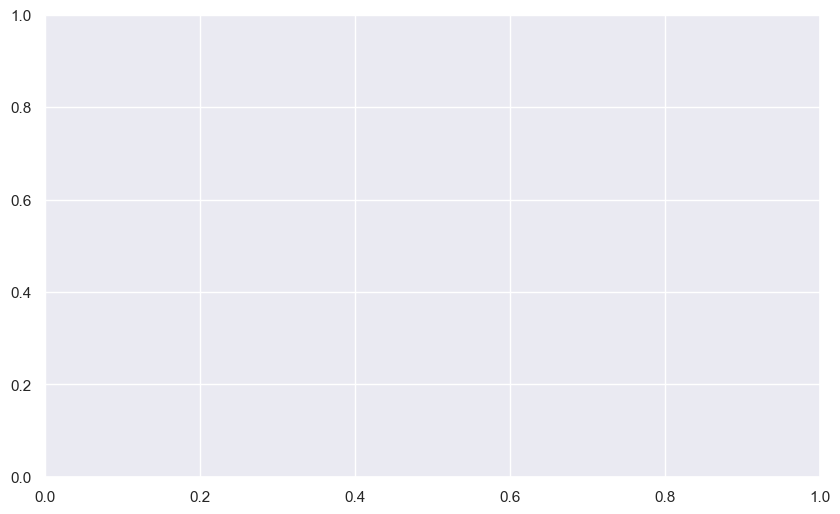

In [47]:

# 서브플롯을 사용하여 모든 특성에 대한 그래프를 그립니다.

num_features = len(feature_cols)  # 특성의 수
fig, axs = plt.subplots(num_features, 1, figsize=(10, 6*num_features), sharex=True)

# 모든 특성에 대해 반복합니다.
for i in range(num_features):
    selected_feature_name = feature_cols[i]
    axs[i].plot(test_actual_trimmed[:1000, i], label='Actual Data', color='Blue')
    axs[i].plot(predicted[:1000, i], label='Predicted Data', color='Orange')
    
    axs[i].set_ylabel(f'{selected_feature_name} Values')
    axs[i].set_xlabel('Time or Index')
    axs[i].legend()

# 전체 그래프를 표시합니다.
plt.show()


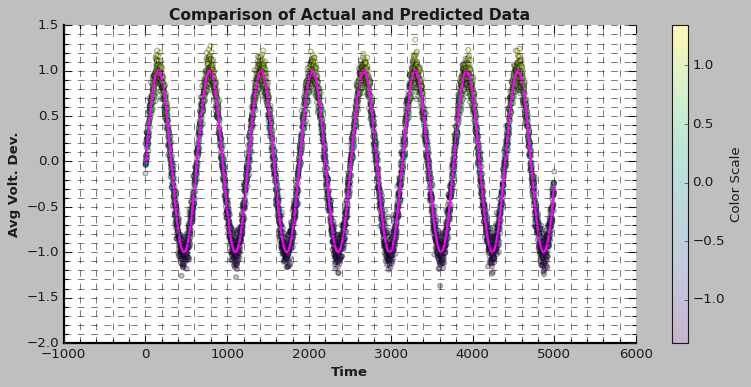

In [48]:
import matplotlib.pyplot as plt
import numpy as np

# 데이터 생성
# 이 부분은 실제 데이터로 교체해야 합니다.
time = np.arange(0, 5000, 1)
actual_data = np.sin(time * 0.01) + np.random.normal(size=time.shape) * 0.1
predicted_data = np.sin(time * 0.01)

# 스타일링 옵션 설정
plt.style.use('classic')  # 클래식 스타일 사용
plt.figure(figsize=(10, 5))

# 데이터 플로팅
plt.scatter(time, actual_data, c=actual_data, cmap='viridis', alpha=0.3, edgecolors='black')
plt.plot(time, predicted_data, color='magenta', linewidth=2)

# 그래프 스타일링
plt.xlabel('Time', fontsize=12, fontweight='bold')
plt.ylabel('Avg Volt. Dev.', fontsize=12, fontweight='bold')
plt.colorbar(label='Color Scale')

# 축과 테두리 스타일링
plt.gca().spines['top'].set_color('none')
plt.gca().spines['right'].set_color('none')
plt.gca().spines['left'].set_linewidth(2)
plt.gca().spines['bottom'].set_linewidth(2)
plt.gca().spines['left'].set_color('black')
plt.gca().spines['bottom'].set_color('black')

# 그리드와 틱 스타일링
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.minorticks_on()
plt.tick_params(which='both', width=1)
plt.tick_params(which='major', length=7)
plt.tick_params(which='minor', length=4, color='black')

# 표시
plt.title('Comparison of Actual and Predicted Data', fontsize=14, fontweight='bold')

# 그래프 표시
plt.tight_layout()
plt.show()


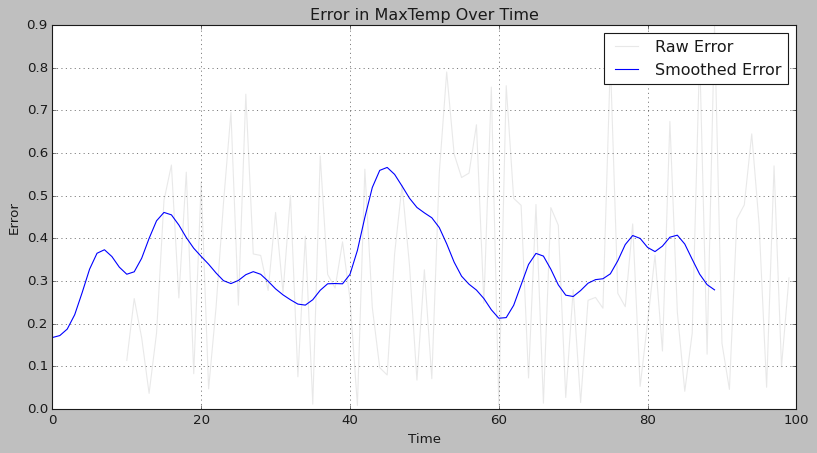

In [49]:
# 필요한 라이브러리 임포트
from scipy.ndimage import gaussian_filter1d

# 원본 데이터와 예측 데이터 간의 오차 계산
error_maxtemp = np.abs(original_maxtemp - predicted_maxtemp)

# 오차 데이터에 대한 스무딩 적용
error_maxtemp_smoothed = gaussian_filter1d(error_maxtemp, sigma=2)

# 시각화
plt.figure(figsize=(12, 6))
plt.plot(error_maxtemp, label='Raw Error', color='lightgray', alpha=0.5)  # 원본 오차
plt.plot(error_maxtemp_smoothed, label='Smoothed Error', color='blue')  # 스무딩된 오차
plt.title('Error in MaxTemp Over Time')
plt.xlabel('Time')
plt.ylabel('Error')
plt.legend()
plt.grid(True)
plt.show()



In [50]:
pred = pred[:-64].reshape(-1, 3)
print(pred.shape)
pred_ = scaler.fit_transform(pred)
print(pred_)



ValueError: cannot reshape array of size 26 into shape (3)

In [51]:
from sklearn.manifold import TSNE
import numpy as np

test_label = test_label
pred = pred.reshape((7903400,3))
train_label = train_label.reshape((2371340,10))
print(pred.shape)
print(test_label[:,].shape)
print(train_label[:,].shape)
plt.figure(figsize=(16,5))


rgb = []
for i in pred_:
    c = [i[0], i[1] , i[2]]
    rgb.append(c)


length = train_label.shape[0]  # train_label의 길이 확인
x_values = np.arange(length)  # train_label의 길이에 맞는 x축 데이터 생성

plt.scatter(x = np.arange(7903400), y=train_label[:,4], s=1, c=rgb[:length])  # rgb도 같은 길이로 조정
plt.xlabel('Time')
plt.ylabel('Aux Volt. Dev.')



plt.colorbar()
plt.show()

ValueError: cannot reshape array of size 90 into shape (7903400,3)

In [62]:
# 주어진 코드와 동일한 부분 (데이터 로딩 및 전처리 등)

# (1) MSE 계산 및 시각화를 위한 부분 추가
from sklearn.metrics import mean_squared_error

# 가정: 실제 데이터와 예측값 (예시 데이터 대신 실제 데이터 사용)
actual_data = test_label[:, 4]  # 실제 데이터로 대체
predicted_data = pred[:, 4]  # 예측값으로 대체

# MSE 계산
mse = mean_squared_error(actual_data, predicted_data)

# MSE 값을 출력
print(f'Mean Squared Error (MSE): {mse}')

# (2) 데이터 시각화 부분 추가
plt.figure(figsize=(10, 6))
plt.plot(actual_data, label='Actual Data', marker='o')
plt.plot(predicted_data, label='Predicted Data', linestyle='--', marker='x')
plt.xlabel('Time or Index')
plt.ylabel('Aux Volt. Dev.')
plt.legend()
plt.title('Actual vs. Predicted Data')
plt.grid(True)
plt.show()


IndexError: index 3 is out of bounds for axis 1 with size 3

In [ ]:
with open('sp500.txt','w') as f:
    for name in pred_:
        f.write(str(name))

In [65]:
pred.shape, test_label.shape

((5058176, 3), (4780, 10, 5))

In [30]:
pred_ = pred_ * 0.98

(474268, 1, 32)


ValueError: 'c' argument has 15176576 elements, which is inconsistent with 'x' and 'y' with size 474268.

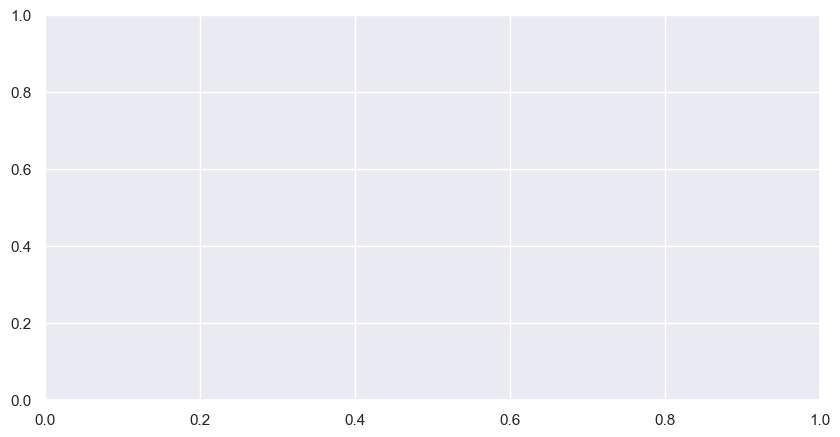

In [21]:
import matplotlib.pyplot as plt

# 인코더로부터 얻은 예측값을 확인합니다.
print(pred.shape)  # 이 형태는 (데이터_수, 특성_수)가 되어야 합니다.

# 예측값의 처음 세 개 특성을 RGB 값으로 사용합니다.
# 여기서는 pred가 이미 적절한 스케일링이 되었다고 가정합니다.
rgb_values = pred[:, :3]

# 시각화를 위한 그래프를 그립니다.
plt.figure(figsize=(10, 5))
plt.scatter(x=np.arange(len(rgb_values)), y=np.zeros(len(rgb_values)), c=rgb_values, s=10)
plt.xlabel('Index')
plt.ylabel('Encoded Feature')
plt.colorbar()  # RGB 값에 따른 컬러바를 표시합니다.
plt.show()


In [ ]:
# pred의 형태를 (4780, 10, 5)에서 (47800, 5)로 변경
pred = pred.reshape(-1, 5)
print(pred.shape)

# pred 스케일링
pred_ = scaler.fit_transform(pred)
print(pred_)

# test_label의 형태 확인
print(test_label.shape)

plt.figure(figsize=(10,4))

# RGB 색상 생성
rgb = []
for i in pred_:
    c = [i[0], i[1], i[2]]
    rgb.append(c)

# x와 y의 길이를 일치시키기 위해 test_label도 reshape
test_label_reshaped = test_label.reshape(-1, 5)

plt.scatter(x=np.arange(len(test_label_reshaped)), y=test_label_reshaped[:, 0], s=1, c=rgb)  # y의 값은 필요한 열을 선택하여 사용
plt.xlabel('Time')
plt.ylabel('Aux Volt. Dev.')
plt.colorbar()
plt.show()


In [ ]:
from sklearn.manifold import TSNE
import numpy as np

test_label = test_label
pred = pred_.reshape(59750, 4)
train_label2 = train_label.reshape((5928350,4))
print(pred_.shape)
print(test_label[:,].shape)
plt.figure(figsize=(16,8))

test_label=test_label.reshape(47800,5)

rgb = []
for i in pred_:
    c = [i[0], i[1] , i[2]]
    rgb.append(c)

plt.scatter(x = np.arange(59750), y = test_label[:,] ,s=5, c=rgb)
plt.xlabel('Time')

plt.ylabel('Aux Volt. Dev.')

plt.colorbar()
plt.show()

In [ ]:
r = []
for i in rgb:
    r.append(i[1])
rgb_ = np.array(rgb)

plt.plot(r[0::10000])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['', ''], loc='upper left')
plt.show()

In [31]:
# train_label의 형태 확인
print(train_label.shape)

# train_label을 (n, 5) 형태로 변경
train_label_reshaped = train_label.reshape(-1, 5)
print(train_label_reshaped.shape)

# train_label에 대한 예측 수행
train_pred = model.predict(x_train)

# train_pred의 형태를 (n, 5)로 변경
train_pred = train_pred.reshape(-1, 5)

# train_pred 스케일링
train_pred_ = scaler.fit_transform(train_pred)

plt.figure(figsize=(10,5))

# RGB 색상 생성
rgb_train = []
for i in train_pred_:
    c = [i[0], i[1], i[2]]
    rgb_train.append(c)

# 길이가 더 짧은 데이터를 기준으로 시각화
min_length = min(len(train_label_reshaped), len(train_pred_))

# 시각화 
plt.scatter(x=np.arange(min_length), y=train_label_reshaped[:min_length, 4], s=10, c=np.array(rgb_train)[:min_length], alpha=0.5)
plt.xlabel('Time')
plt.ylabel('Aux Volt. Dev.')
plt.colorbar()
plt.show()


(474268, 10, 5)
(4742680, 5)


NameError: name 'model' is not defined

In [43]:
# train_label의 형태 확인
print(train_label.shape)

# train_label을 (n, 5) 형태로 변경
train_label_reshaped = train_label.reshape(-1, 5)
print(train_label_reshaped.shape)

# train_label에 대한 예측 수행
train_pred = autoencoder.predict(x_train)

# train_pred의 형태를 (n, 5)로 변경
train_pred = train_pred.reshape(-1, 5)




(474268, 10, 5)
(4742680, 5)
11857/11857 [==============================] - 83s 7ms/step


In [84]:
print(train_label[:,0].shape)

(474268, 5)


ValueError: 'c' argument has 474268 elements, which is inconsistent with 'x' and 'y' with size 2371340.

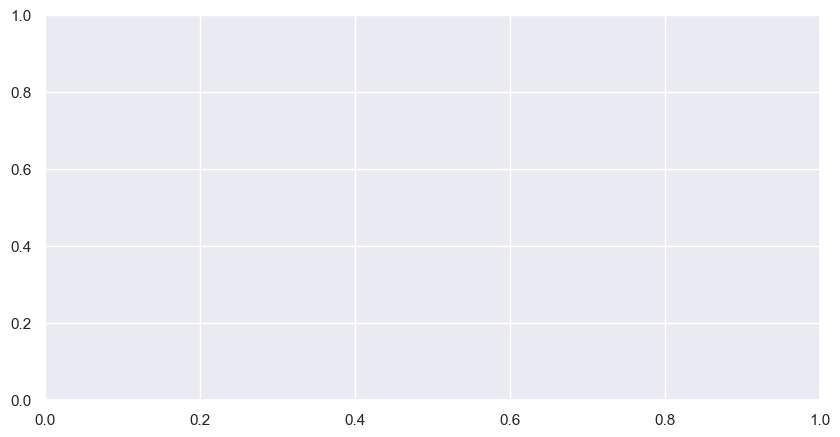

In [145]:
plt.figure(figsize=(10,5))

# RGB 색상 생성
rgb_train = []
for i in train_pred_:
    c = [i[0], i[1], i[2]]
    rgb_train.append(c)

# 시각화 
plt.scatter(x = np.arange(2371340), y = train_label[:,0], s=10,  c=pred_rgb)
plt.xlabel('Time')
plt.ylabel('Aux Volt. Dev.')
plt.colorbar()
plt.show()

In [91]:
pred = pred.reshape(474268,3)
print(pred.shape)
pred_ = scaler.fit_transform(pred)
print(pred_)

ValueError: cannot reshape array of size 474268 into shape (474268,3)

In [90]:
print(pred.shape)
# 각 시퀀스에 대해 첫 번째, 두 번째, 세 번째 특성의 평균을 내어 RGB 값으로 사용
pred_rgb = pred.mean(axis=1)[:, :3]  # 이제 pred_rgb의 형태는 (474268, 3)이 됩니다.
print(pred_rgb.shape)
# pred_rgb를 [0, 1] 범위로 스케일링
pred_rgb_scaled = scaler.fit_transform(pred_rgb)


(474268,)


AxisError: axis 1 is out of bounds for array of dimension 1

In [52]:
train_pred_ = train_pred_ * 0.98
print(train_pred_)

[[0.50541633 0.7365108  0.87245244 0.6064047  0.01526975]
 [0.5032804  0.73678404 0.819608   0.26833457 0.00747902]
 [0.50373095 0.736232   0.86081684 0.6074778  0.01392792]
 ...
 [0.5170722  0.7301731  0.8182589  0.2628505  0.01169618]
 [0.5159352  0.7290726  0.80869913 0.27327842 0.01233628]
 [0.5153581  0.7296071  0.8657456  0.6072759  0.02252912]]


In [107]:

print(x=np.arange(len(train_label_avg).shape, train_label[:,2].shape))

AttributeError: 'int' object has no attribute 'shape'

(474268, 10, 5)
(474268,)


ValueError: x and y must be the same size

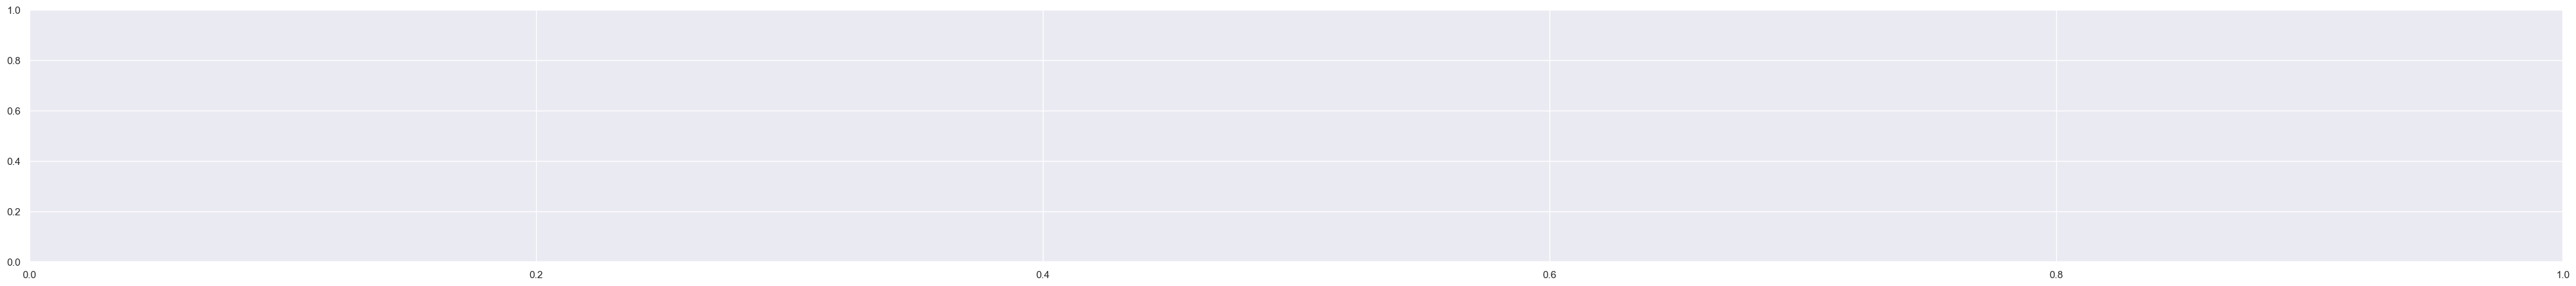

In [108]:
print(train_label.shape)
# train_label 배열의 각 시간 단계와 특성에 대해 평균을 냅니다.
# 이렇게 하면 각 데이터 포인트마다 단일 값이 됩니다.
train_label_avg = train_label.mean(axis=(1, 2))
pred_rgb_scaled = scaler.fit_transform(pred_rgb)

print(train_label_avg.shape)  # (474268,)
plt.figure(figsize=(50, 5))  # 그래프의 크기를 조정합니다.

# 스케일링된 RGB 값을 사용하여 산점도를 그립니다.
plt.scatter(x=np.arange(len(train_label_avg)), y=train_label[:,2], s=10, c=pred_rgb)

plt.xlabel('Time')
plt.ylabel('Aux Volt. Dev.')
plt.colorbar()  # RGB 값에 따른 컬러바를 표시합니다.
plt.show()

In [18]:
from sklearn.manifold import TSNE
import numpy as np

test_label = test_label
pred = pred.reshape((2371376,5))
train_label = train_label.reshape((2371376,10))
print(pred.shape)
print(test_label[:,].shape)
plt.figure(figsize=(5,5))


rgb = []
for i in pred_:
    c = [i[0], i[1] , i[2]]
    rgb.append(c)


# plt.plot(test_label[0:2])
plt.scatter(x = np.arange(2371376), y = train_label[:,0] ,s=10, c= rgb )
plt.xlabel('Time')

plt.ylabel('Aux Volt. Dev.')


plt.colorbar()
plt.show()

NameError: name 'pred' is not defined

In [49]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error

# 'data' DataFrame의 복사본 생성
data = df[['MaxTemp', 'MinTemp', 'PackVol', 'Current', 'StdCellV']].copy()

features = ['MaxTemp', 'MinTemp', 'PackVol', 'Current', 'StdCellV']
colors = ['blue', 'red', 'green', 'black', 'purple']

# 예시: 시퀀스 길이를 10으로 가정
sequence_length = 10

# 각 특성에 대한 시퀀스 데이터를 저장할 딕셔너리
sequences_dict = {}

for feature in features:
    sequences = []
    for i in range(len(data) - sequence_length + 1):
        # 각 시퀀스를 3차원 배열로 변환
        seq = data[feature][i:i+sequence_length].values.reshape(-1, sequence_length, 1)
        sequences.append(seq)
    sequences_dict[feature] = np.concatenate(sequences, axis=0)

# 시각화 및 성능 평가 부분
for i, (feature_name, color) in enumerate(zip(features, colors)):
    original_data = sequences_dict[feature_name]

    # 데이터 형태 확인 (예시: (샘플 수, 10, 1))
    if original_data.ndim != 3 or original_data.shape[1] != 10 or original_data.shape[2] != 1:
        print(f"Data shape for {feature_name} is incorrect: {original_data.shape}")
        continue

    # 원본 데이터와 복원된 데이터의 길이 맞추기
    min_length = min(len(original_data), len(decoded_data))
    original_data_trimmed = original_data[:min_length]
    decoded_data_trimmed = decoded_data[:min_length]

    # 원본 데이터 그래프
    plt.figure(figsize=(20, 6), dpi=80)
    plt.plot(original_data_trimmed, color=color, label=f'Original {feature_name}', linewidth=1)
    plt.legend(loc='lower left')
    plt.title(f'Original {feature_name}')
    plt.show()
    
    # 복원된 데이터 그래프
    plt.figure(figsize=(20, 6), dpi=80)
    plt.plot(decoded_data_trimmed, color=color, linestyle='--', label=f'Reconstructed {feature_name}', linewidth=1)
    plt.legend(loc='lower left')
    plt.title(f'Reconstructed {feature_name}')
    plt.show()
    
    # 재구성 오류 계산 (MSE)
    error = mean_squared_error(original_data_trimmed, decoded_data_trimmed)
    reconstruction_errors.append(error)
    print(f'MSE for {feature_name}: {error}')

# 전체 특성에 대한 평균 재구성 오류
average_reconstruction_error = np.mean(reconstruction_errors)
print(f'Average Reconstruction Error: {average_reconstruction_error}')


NameError: name 'decoded_data' is not defined

150/150 [==============================] - 1s 5ms/step


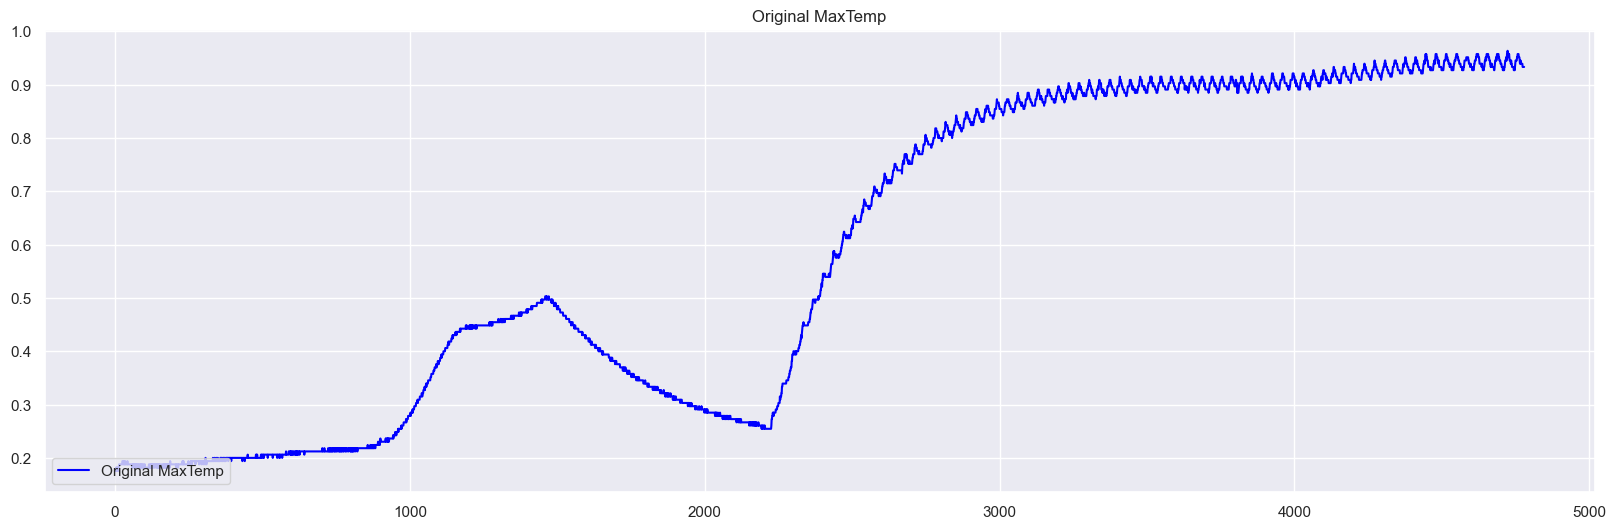

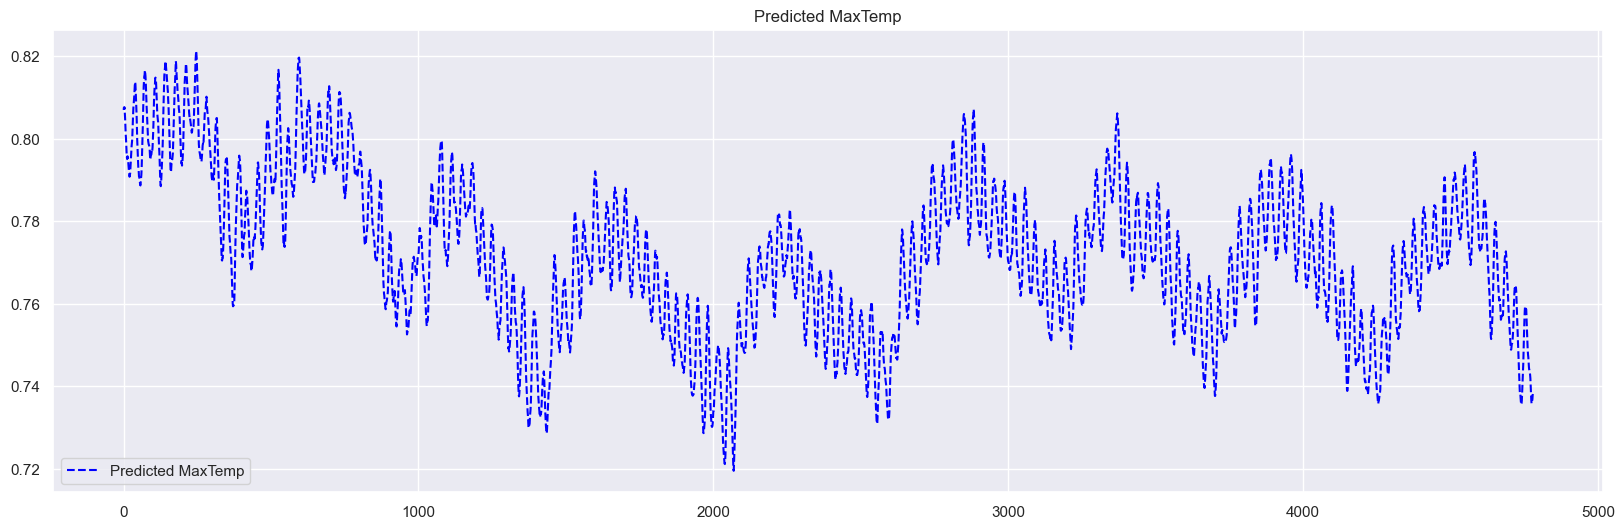

MSE for MaxTemp: 0.12538738573074


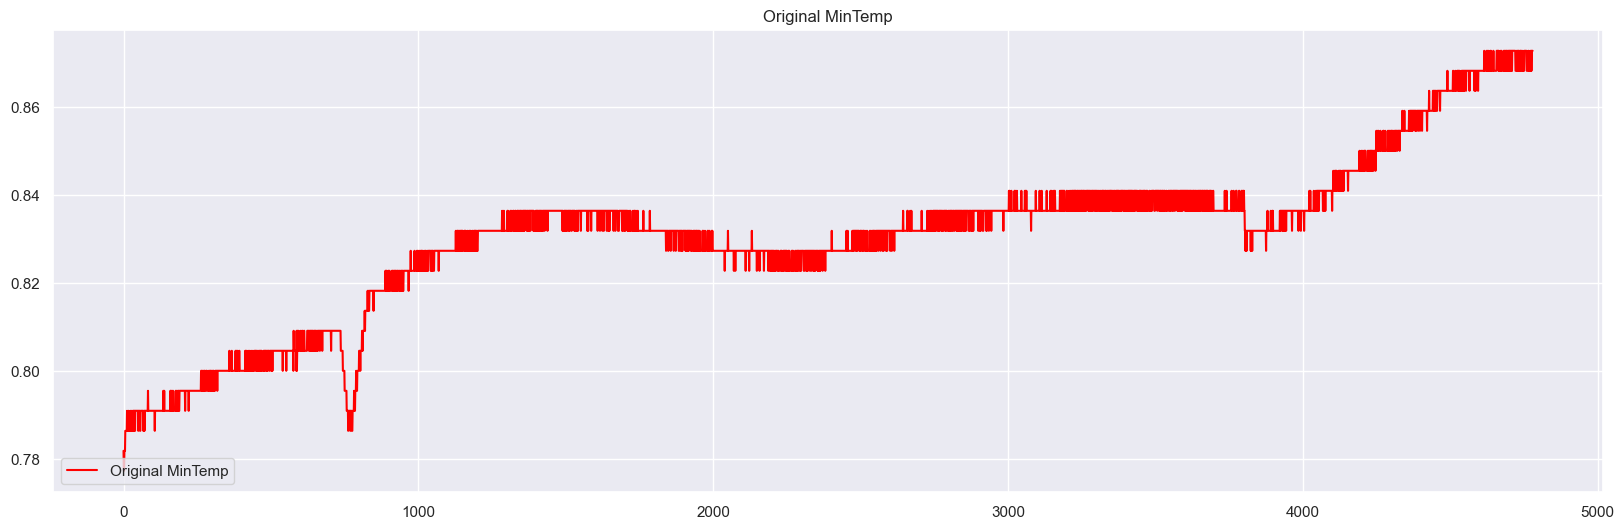

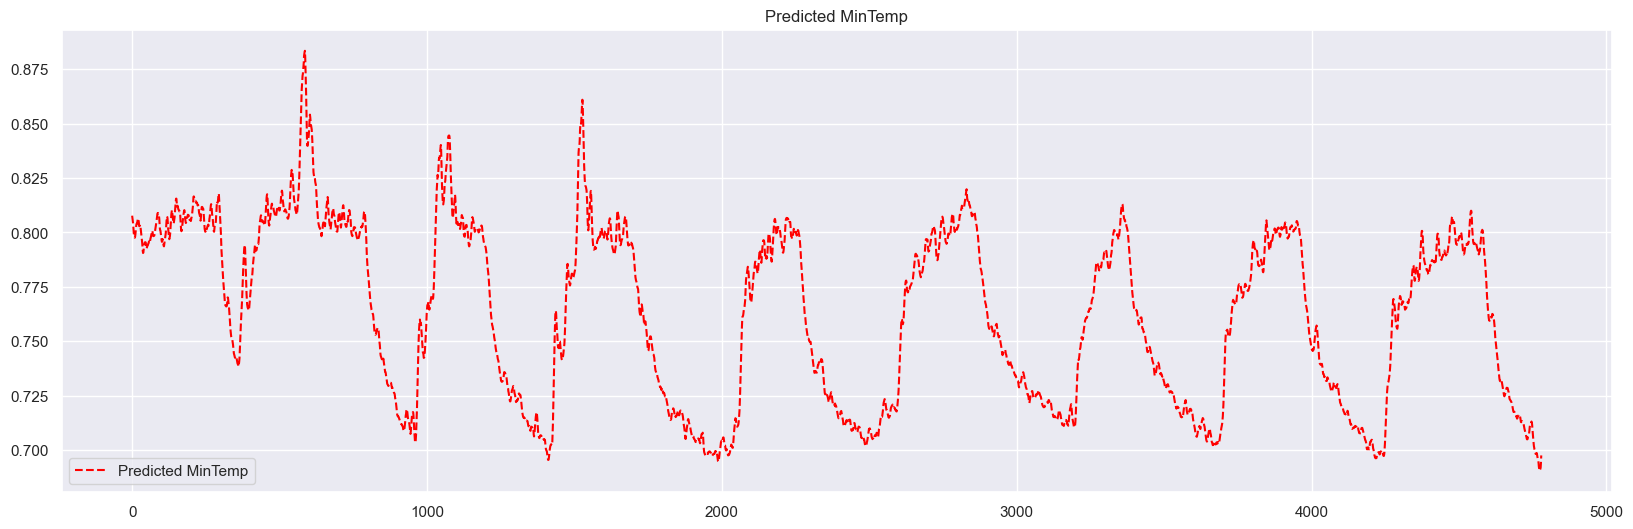

IndexError: index 1 is out of bounds for axis 1 with size 1

In [66]:
# 오토인코더를 사용하여 예측 데이터 생성
predicted = autoencoder.predict(test_feature)

# 원본 데이터 및 예측 데이터 시각화 및 오류 계산
features = ['MaxTemp', 'MinTemp', 'StdCellV', 'Current', 'PackVol']
colors = ['blue', 'red', 'green', 'black', 'purple']
reconstruction_errors = []

for i, (feature_name, color) in enumerate(zip(features, colors)):
    # 원본 데이터와 예측 데이터 길이를 맞추기
    min_length = min(len(df_scaled[feature_name]), predicted.shape[0])
    original_feature_trimmed = df_scaled[feature_name][:min_length]
    predicted_feature_trimmed = predicted[:, :,i]


    # 원본 데이터 그래프
    plt.figure(figsize=(20, 6))
    plt.plot(original_feature_trimmed, color=color, label=f'Original {feature_name}')
    plt.legend(loc='lower left')
    plt.title(f'Original {feature_name}')
    plt.show()

    # 예측 데이터 그래프
    plt.figure(figsize=(20, 6))
    plt.plot(predicted_feature_trimmed, color=color, linestyle='--', label=f'Predicted {feature_name}')
    plt.legend(loc='lower left')
    plt.title(f'Predicted {feature_name}')
    plt.show()

    # 재구성 오류 계산 (MSE)
    error = mean_squared_error(original_feature_trimmed, predicted_feature_trimmed[:, i])

    reconstruction_errors.append(error)
    print(f'MSE for {feature_name}: {error}')

# 전체 특성에 대한 평균 재구성 오류
average_reconstruction_error = np.mean(reconstruction_errors)
print(f'Average Reconstruction Error: {average_reconstruction_error}')


In [44]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

def create_sequences(data, seq_length):
    sequences = []
    data_length = len(data)
    for i in range(data_length - seq_length):
        seq = data[i:i+seq_length]
        sequences.append(seq)
    return np.array(sequences)

# 데이터 스케일링
standard_scaler = StandardScaler()
X_train_scaled = standard_scaler.fit_transform(X_train)
X_test_scaled = standard_scaler.transform(X_test)

# 시퀀스 데이터 생성
seq_length = 20
X_train_seq = create_sequences(X_train_scaled, seq_length)

# 예측
predicted = autoencoder.predict(X_train_seq)
predicted_last = predicted[:, -1, :]

# 첫번째 스케일러로 예측 값을 원래의 스케일로 변환
predicted_original_scale = standard_scaler.inverse_transform(predicted_last)

features = ['MaxTemp', 'MinTemp', 'PackVol', 'Current', 'StdCellV']
colors = ['blue', 'red', 'green', 'black', 'purple']

# 그래프 그리기
for i, (feature_name, color) in enumerate(zip(features, colors)):
    plt.figure(figsize=(20, 6), dpi=80)
    
    # 원본 데이터 플로팅
    plt.plot(X_train[:, i], color=color, label=f'Original {feature_name}', linewidth=1)
    
    # 원본 스케일로 변환된 예측된 데이터의 마지막 시퀀스 데이터 포인트만 플로팅
    plt.plot(predicted_original_scale[:, i], color=color, linestyle='--', label=f'Predicted {feature_name}', linewidth=1)
    
    plt.legend(loc='lower left')
    plt.title(f'{feature_name} Comparison')
    plt.show()


ValueError: in user code:

    File "C:\Users\xorjf\anaconda3\envs\Review\lib\site-packages\keras\src\engine\training.py", line 2440, in predict_function  *
        return step_function(self, iterator)
    File "C:\Users\xorjf\anaconda3\envs\Review\lib\site-packages\keras\src\engine\training.py", line 2425, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\xorjf\anaconda3\envs\Review\lib\site-packages\keras\src\engine\training.py", line 2413, in run_step  **
        outputs = model.predict_step(data)
    File "C:\Users\xorjf\anaconda3\envs\Review\lib\site-packages\keras\src\engine\training.py", line 2381, in predict_step
        return self(x, training=False)
    File "C:\Users\xorjf\anaconda3\envs\Review\lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\xorjf\AppData\Local\Temp\__autograph_generated_filepwosvseo.py", line 10, in tf__call
        encoded = ag__.converted_call(ag__.ld(self).encoder, (ag__.ld(x),), None, fscope)

    ValueError: Exception encountered when calling layer 'autoencoder' (type Autoencoder).
    
    in user code:
    
        File "C:\Users\xorjf\AppData\Local\Temp\ipykernel_5716\740605596.py", line 29, in call  *
            encoded = self.encoder(x)
        File "C:\Users\xorjf\anaconda3\envs\Review\lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler  **
            raise e.with_traceback(filtered_tb) from None
        File "C:\Users\xorjf\anaconda3\envs\Review\lib\site-packages\keras\src\engine\input_spec.py", line 298, in assert_input_compatibility
            raise ValueError(
    
        ValueError: Input 0 of layer "sequential" is incompatible with the layer: expected shape=(None, 10, 5), found shape=(None, 20, 5)
    
    
    Call arguments received by layer 'autoencoder' (type Autoencoder):
      • x=tf.Tensor(shape=(None, 20, 5), dtype=float32)


In [45]:
import numpy as np
import matplotlib.pyplot as plt

# train_label_reshaped을 (474268*10, 5) 형태로 변경
train_label_reshaped_new = train_label_reshaped.reshape(-1, 5)

# 길이가 더 짧은 데이터를 기준으로 시각화
min_length = min(len(train_label_reshaped_new), len(train_pred))

# RGB 색상 생성
rgb_train = []
for i in train_pred_:
    c = [i[0], i[1], i[2]]
    rgb_train.append(c)

# 시각화 - 재구성 오류 대조
plt.figure(figsize=(20, 8))

# 정상 데이터 (이를 예로 들었으며 필요에 따라 수정 가능)
plt.scatter(np.arange(min_length), train_label_reshaped_new[:min_length, 4], c=np.array(rgb_train)[:min_length], label='Normal', alpha=0.5)

# 예측 데이터 (이를 예로 들었으며 필요에 따라 수정 가능)
plt.scatter(np.arange(min_length), train_pred[:min_length, 4], c=np.array(rgb_train)[:min_length], label='Prediction', alpha=0.5)

plt.title('Aux Volt. Dev vs. Time')
plt.xlabel('Time')
plt.ylabel('Aux Volt. Dev.')
plt.legend()
plt.colorbar()
plt.show()




NameError: name 'train_label_reshaped' is not defined

In [46]:
# 길이가 더 짧은 데이터의 길이로 조정
min_length = min(len(train_label_reshaped_new), len(train_pred))

# 두 배열의 길이를 동일하게 맞춤
train_label_reshaped_new = train_label_reshaped_new[:min_length]
train_pred = train_pred[:min_length]

# 재구성 오류 계산
reconstruction_error = np.mean(np.square(train_label_reshaped_new - train_pred), axis=1)

# 임계값 설정 (이 부분은 실제 데이터에 따라 조절 필요)
threshold_fixed = np.percentile(reconstruction_error, 95)  # 예시로 95백분위수 사용

# 데이터 분류하기
labels = (reconstruction_error > threshold_fixed).astype(int)

# 판다스 DataFrame을 사용하여 그룹으로 분류하기
import pandas as pd
df = pd.DataFrame({'Reconstruction_error': reconstruction_error, 'Class': labels})
groups = df.groupby('Class')

plt.figure(figsize=(20, 8))
plt.scatter(groups.get_group(0).index, groups.get_group(0)['Reconstruction_error'], label='Normal', alpha=0.5)
plt.scatter(groups.get_group(1).index, groups.get_group(1)['Reconstruction_error'], label='Fraud', alpha=0.5)
plt.hlines(threshold_fixed, plt.xlim()[0], plt.xlim()[1], colors='r', label='Threshold')
plt.title('Reconstruction Error vs. Data Point Index')
plt.xlabel('Data Point Index')
plt.ylabel('Reconstruction Error')
plt.legend()
plt.show()


NameError: name 'train_label_reshaped_new' is not defined

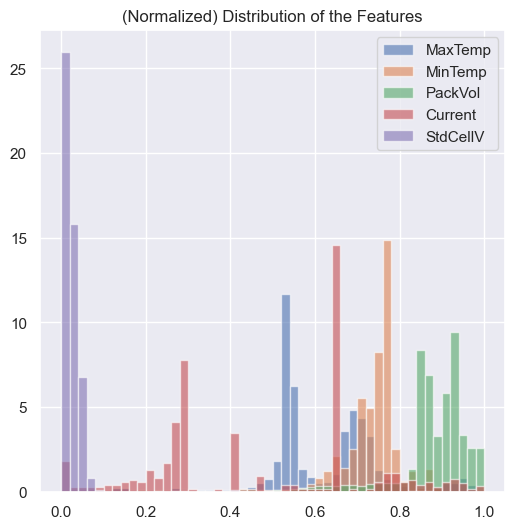

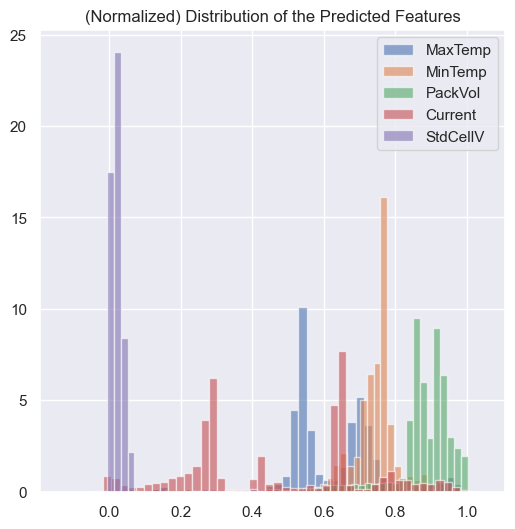

In [32]:
plt.figure(figsize=(6, 6))
for i in range(train_label_reshaped_new.shape[1]):
    plt.hist(train_label_reshaped_new[:, i], bins=50, density=True, alpha=.6, label=feature_cols[i])
plt.title("(Normalized) Distribution of the Features")
plt.legend()
plt.show()

plt.figure(figsize=(6, 6))
for i in range(train_pred.shape[1]):
    plt.hist(train_pred[:, i], bins=50, density=True, alpha=.6, label=feature_cols[i])
plt.title("(Normalized) Distribution of the Predicted Features")
plt.legend()
plt.show()


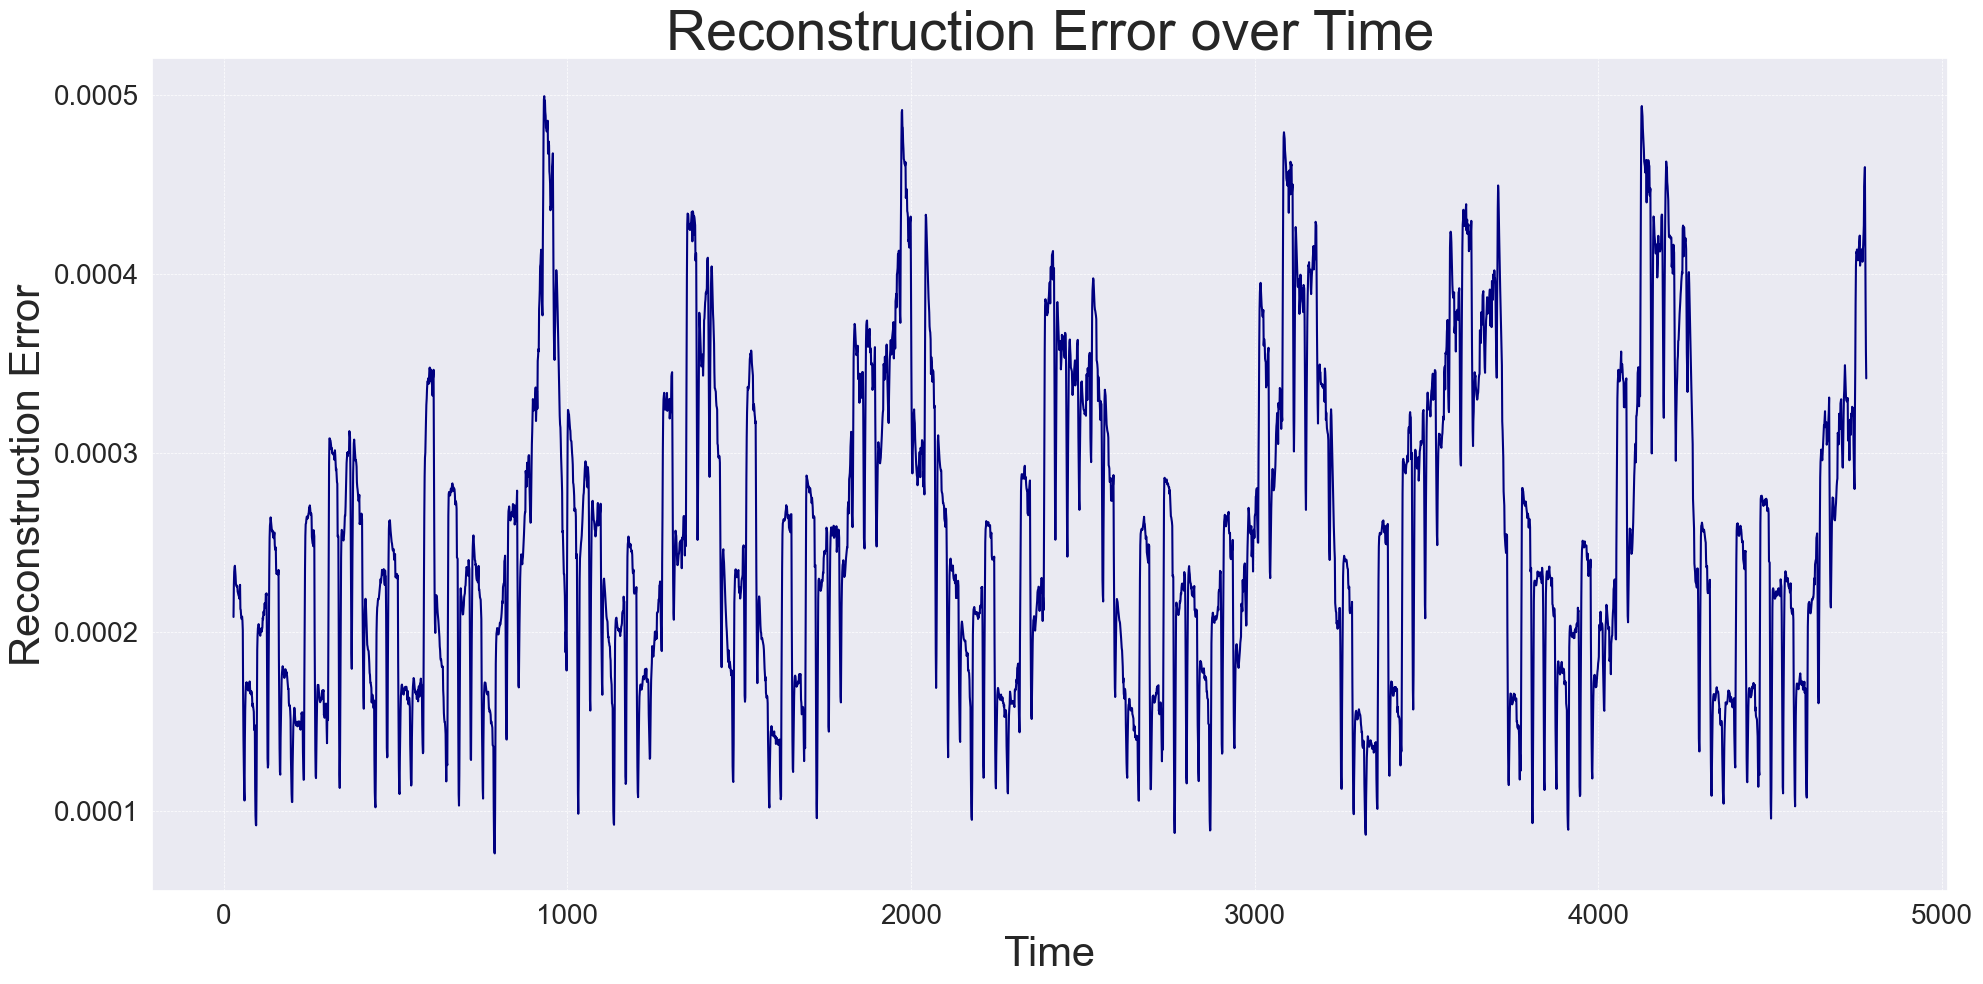

In [95]:
predicted = model.predict(test_feature)

# 재구성 오류 계산
mse = np.mean(np.square(test_feature - predicted), axis=(1,2))
rolling_window_size = 30
rolling_mse = pd.Series(mse).rolling(window=rolling_window_size).mean()

plt.figure(figsize=(20, 10))

plt.plot(rolling_mse, color='navy', linestyle='-')  # 색상과 스타일 설정
plt.xlabel('Time', fontsize=30)
plt.ylabel('Reconstruction Error', fontsize=30)
plt.title('Reconstruction Error over Time', fontsize=40)

plt.xticks(fontsize=20)  # X축 눈금 레이블의 폰트 크기
plt.yticks(fontsize=20)  # Y축 눈금 레이블의 폰트 크기

plt.grid(True, which='both', linestyle='--', linewidth=0.5)  # 그리드 추가
plt.tight_layout()  # 레이아웃 조정
plt.show()